In [ ]:
# 🎵 Music Data Clustering 
# -------------------------------------------------------
# Imports
# -------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1️⃣ Load Data
# -------------------------------------------------------
df = pd.read_csv(r"F:\amazon music\single_genre_artists.csv ")
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [3]:
#Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [4]:
#Get statistical summary of the datase
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [5]:
#Check for missing values
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [6]:
#Check for duplicate entries
df.duplicated().sum()

np.int64(0)

In [7]:
#Check the shape of the dataset
df.shape

(95837, 23)

In [8]:
#Display the columns of the datasetdf
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

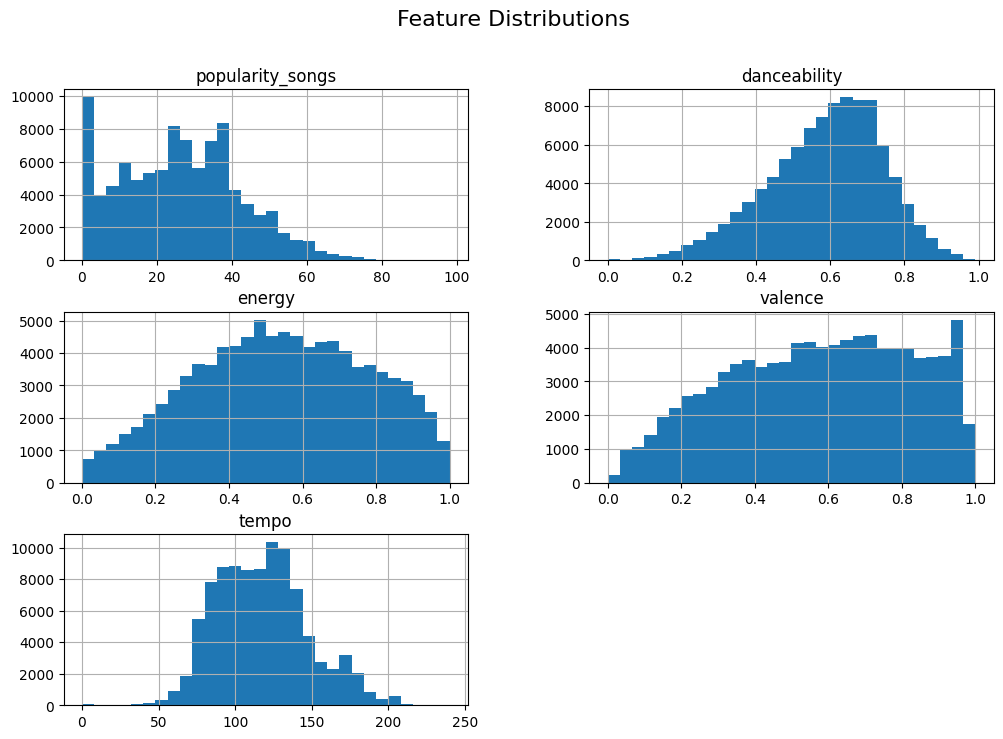

In [9]:
import matplotlib.pyplot as plt

key_features =['popularity_songs', 'danceability', 'energy', 'valence', 'tempo']

df[key_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [10]:
df=df.drop(columns=['name_song','name_artists','id_songs'],axis=True)


In [11]:
df

,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,popularity_artists
0,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],22
1,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,-15.375,1,0.0670,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],22
2,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,-15.514,1,0.0592,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],22
3,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,-12.393,0,0.1650,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],22
4,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,-13.806,1,0.1380,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,-6.356,1,0.0408,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],56
95833,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],36
95834,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],52
95835,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],55


In [12]:
from sklearn.preprocessing import StandardScaler

# Columns used for clustering in your original df
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
scaler.fit(df[features])  # fit only on these numeric features

# Now transform uploaded song with same columns
music_data_scaled = scaler.transform(df[features])

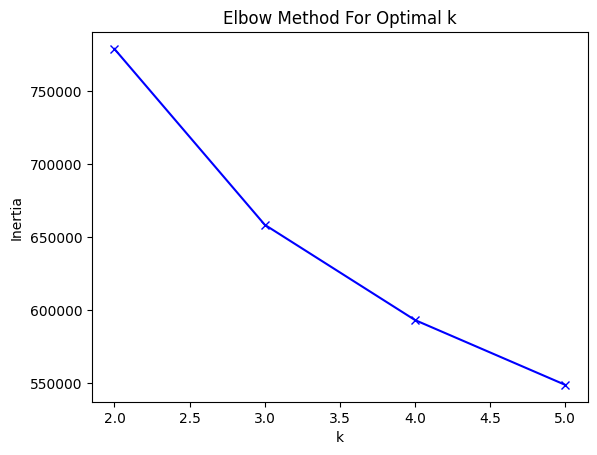

In [13]:
# K-Means Clustering with Elbow Method and Silhouette Score
# -------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
inertia = []  #Inertia is a metric used to evaluate how well the K-means clustering algorithm has performed.
K = range(2,6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(music_data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

k=2, Silhouette Score: 0.2032
k=3, Silhouette Score: 0.2423
k=4, Silhouette Score: 0.2310
k=5, Silhouette Score: 0.1864


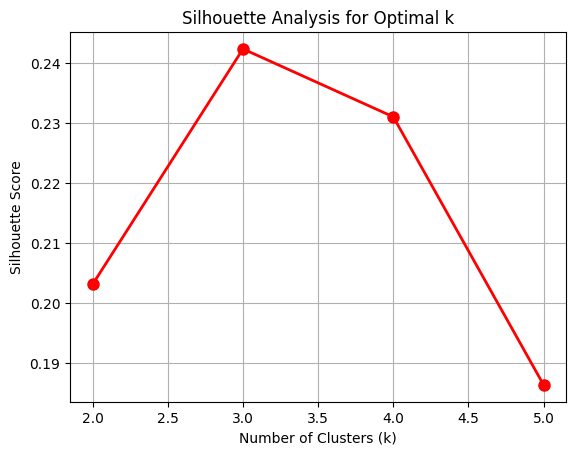

In [14]:
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(music_data_scaled)
    sil_avg = silhouette_score(music_data_scaled, labels)
    sil_scores.append(sil_avg)
    print(f"k={k}, Silhouette Score: {sil_avg:.4f}")

plt.plot(K, sil_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

In [15]:
k = 3  # or 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(music_data_scaled)  # scaled_features = after StandardScaler 

# Add to original data
df['cluster'] = cluster_labels

In [16]:
# Compute metrics
sil_score = silhouette_score(music_data_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2424


In [17]:
# Compute mean feature values per cluster
cluster_profiles = df.groupby('cluster')[features].mean()
print("\nCluster Profiles (Mean Feature Values):\n")
print(cluster_profiles.round(3))


Cluster Profiles (Mean Feature Values):

         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.486   0.311   -13.209        0.060         0.750   
1               0.627   0.693    -7.609        0.075         0.259   
2               0.664   0.467   -13.364        0.830         0.586   

         instrumentalness  liveness  valence    tempo  duration_ms  
cluster                                                             
0                   0.169     0.182    0.413  111.933   223500.905  
1                   0.051     0.200    0.666  124.905   226568.205  
2                   0.001     0.435    0.584  100.387    97522.338  


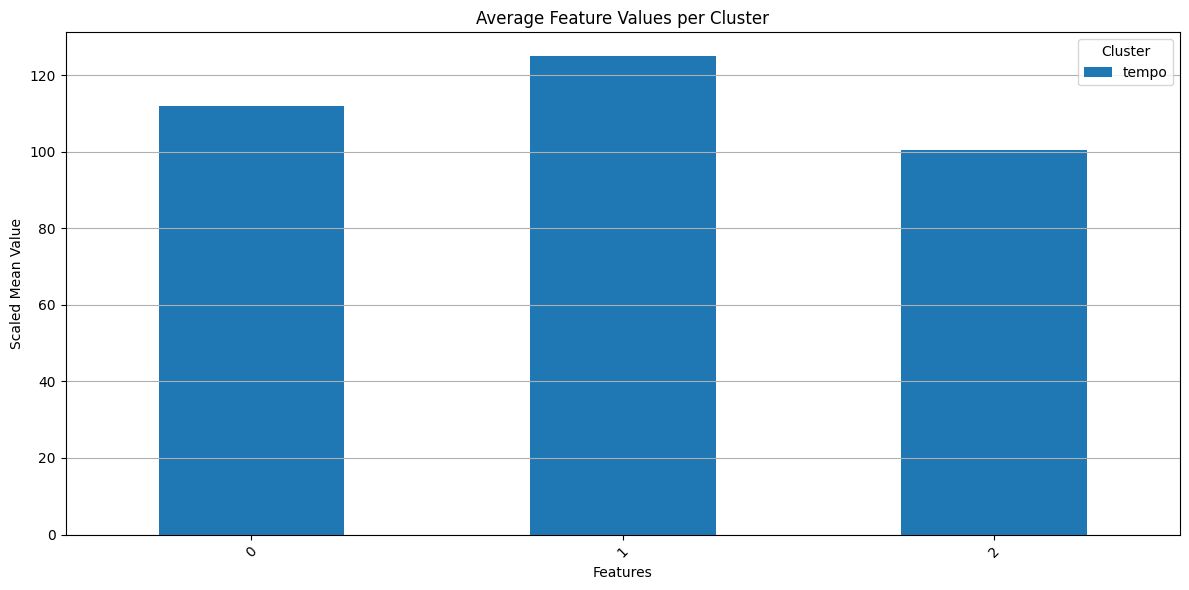

In [18]:
# Visualize cluster profiles
cluster_profiles["tempo"].plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Scaled Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

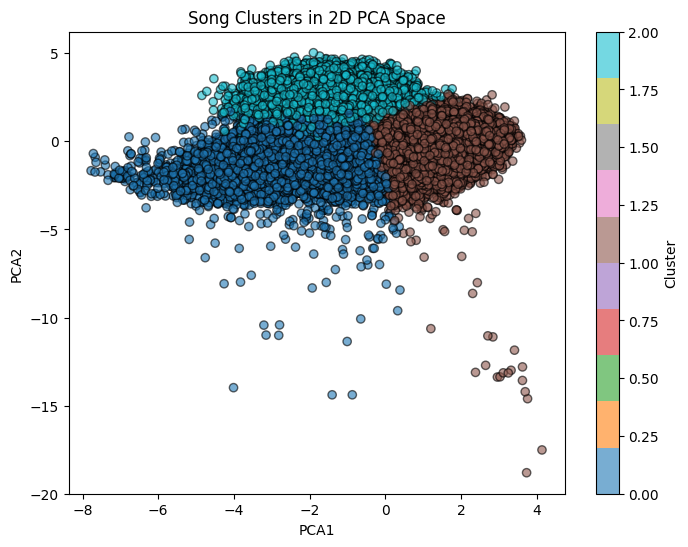

In [19]:
# Dimensionality Reduction with PCA
# -------------------------------
from sklearn.decomposition import PCA #Principal component analysis 
pca = PCA(n_components=2)
df[['pca1', 'pca2']] = pca.fit_transform(music_data_scaled)

# Step 3: Visualization
plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='tab10', alpha=0.6, edgecolor='k')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Song Clusters in 2D PCA Space")
plt.colorbar(label="Cluster")  # adds legend for clusters
plt.show()

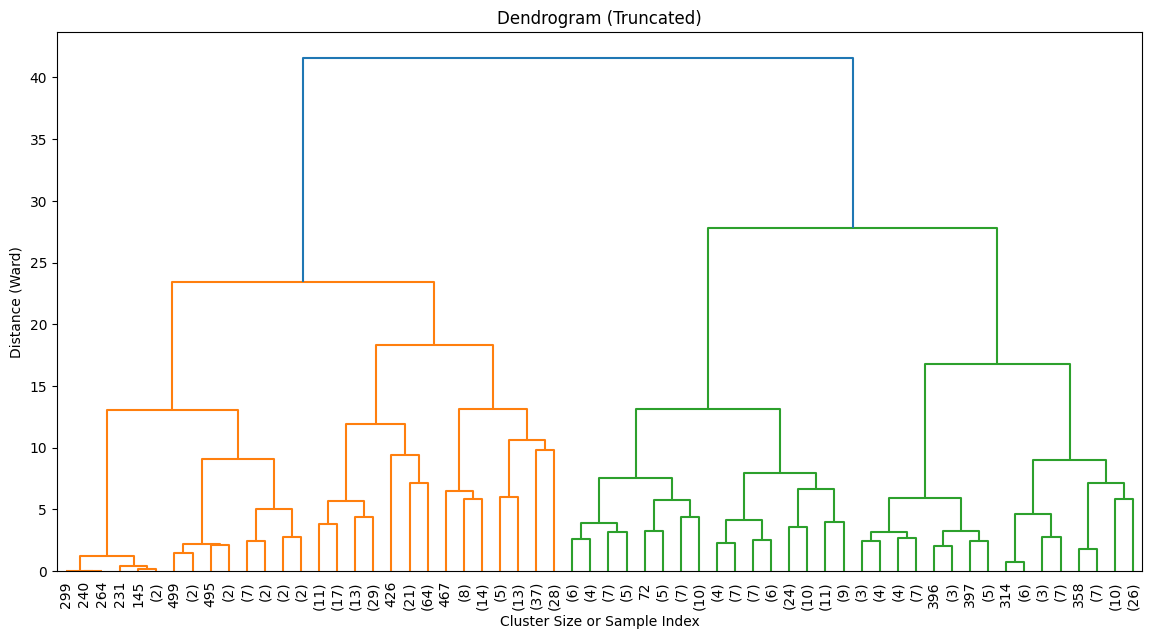

In [20]:
#dendrogram display
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a sample (e.g., first 500 songs) for dendrogram — full dataset is too slow
sample_size = min(500, len(music_data_scaled))
X_sample = music_data_scaled[:sample_size]

# Compute linkage
linked = linkage(X_sample, method='ward')  # 'ward' minimizes within-cluster variance

# Plot
plt.figure(figsize=(14, 7))
dendrogram(linked, 
           truncate_mode='level', 
           p=5,  # show last 5 merges
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrogram (Truncated)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance (Ward)')
plt.grid(False)
plt.show()

In [21]:
# Hierarchical Clustering on Sampled Data
# -------------------------------
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Sample 3000 rows for hierarchical clustering
sample_size = 3000
np.random.seed(42)  # for reproducibility
sample_indices = np.random.choice(music_data_scaled.shape[0], size=sample_size, replace=False)
X_sample = music_data_scaled[sample_indices]

# Apply clustering on sample
k = 4
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels_hc = hc.fit_predict(X_sample)

# Assign cluster labels to original dataframe for the sampled rows
df['cluster_hc'] = np.nan  # initialize with NaN
df.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc

# Optional: Create sampled df with labels
df_sampled = df.iloc[sample_indices].copy()
df_sampled['cluster_hc'] = cluster_labels_hc
df['cluster_hc'] =df_sampled['cluster_hc']

# Evaluate
score = silhouette_score(X_sample, cluster_labels_hc)
print(f"✅ Hierarchical clustering applied on {sample_size} samples.")
print(f"✅ Hierarchical ({k} clusters) → Silhouette Score: {score:.4f}")

✅ Hierarchical clustering applied on 3000 samples.
✅ Hierarchical (4 clusters) → Silhouette Score: 0.2160


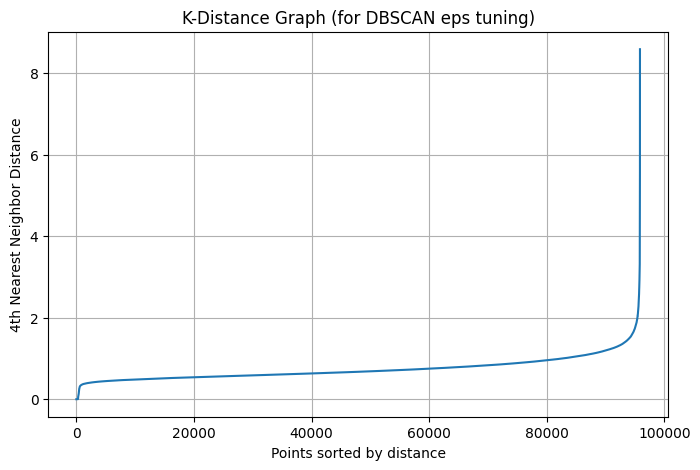

In [22]:
from sklearn.neighbors import NearestNeighbors

# Calculate distance to 4th nearest neighbor (min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(music_data_scaled)
distances, indices = neighbors_fit.kneighbors(music_data_scaled)

# Sort distances
distances = np.sort(distances[:, 3], axis=0)  # 4th column

# Plot
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph (for DBSCAN eps tuning)')
plt.grid(True)
plt.show()

In [24]:
# DBSCAN Clustering with Dimensionality Reduction
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Parameters
max_samples = 50000

# Step 0: Slice only if needed
if music_data_scaled.shape[0] > max_samples:
    X_scaled = music_data_scaled[:max_samples]
    music_data_limited = df.iloc[:max_samples].copy()
else:
    X_scaled = music_data_scaled
    music_data_limited = df.copy()

# Step 1: Reduce dimensionality
pca = PCA(n_components=10, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Step 2: Run DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=4, algorithm='ball_tree')
cluster_labels_dbscan = dbscan.fit_predict(X_reduced)

# Step 3: Add labels
music_data_limited['cluster_dbscan'] = cluster_labels_dbscan
df['cluster_dbscan']=music_data_limited['cluster_dbscan']

# Step 4: Print results
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 4
Estimated number of noise points: 72


In [25]:
cluster_labels = {
    0: 'Instrumental / Acoustic',
    1: 'Mainstream / Party',
    2: 'Happy / Dance',
    3: 'Vocal / Speech-heavy',
    4: 'Chill / Relaxing'
}
df['Cluster_Label'] = df['cluster'].map(cluster_labels)

In [26]:
from sklearn.metrics import silhouette_score

print("=======================================")
print("📊 CLUSTERING METHOD COMPARISON")
print("=======================================")

# ✅ KMEANS — Full dataset
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(music_data_scaled)
sil_kmeans = silhouette_score(music_data_scaled, cluster_labels_kmeans)
print(f"KMeans         (k=3) → Silhouette Score: {sil_kmeans:.4f}")

# ✅ DBSCAN — Use limited dataset and filter noise
mask = cluster_labels_dbscan != -1
if mask.sum() > 1 and len(set(cluster_labels_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_reduced[mask], cluster_labels_dbscan[mask])
    print(f"DBSCAN             → Silhouette Score: {sil_dbscan:.4f}")
else:
    print("DBSCAN             → Not enough clusters for silhouette score")

# ✅ HIERARCHICAL — Sampled data
score_hc = silhouette_score(X_sample, cluster_labels_hc)
print(f"Hierarchical   (k=3) → Silhouette Score: {score_hc:.4f}")

📊 CLUSTERING METHOD COMPARISON
KMeans         (k=3) → Silhouette Score: 0.2424
DBSCAN             → Silhouette Score: 0.3938
Hierarchical   (k=3) → Silhouette Score: 0.2160


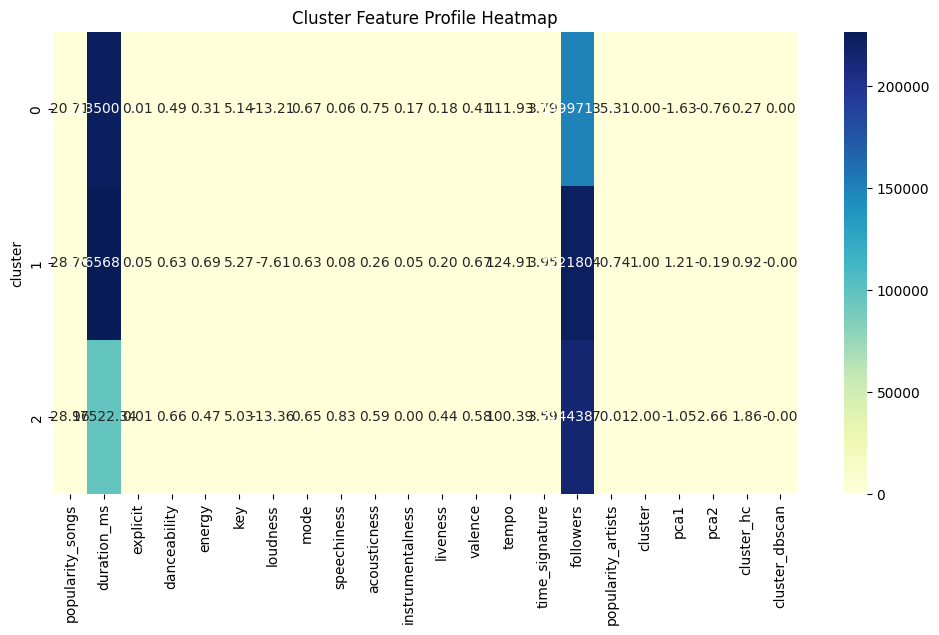

In [27]:
# Heatmap of Cluster Profiles
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute mean of numeric features per cluster
cluster_profile = numeric_df.groupby(df['cluster']).mean()

# Plot heatmap safely
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Feature Profile Heatmap")
plt.show()

In [28]:
# ...existing code...
df['cluster_hc'] = np.nan  # initialize with NaN
df.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc  # assign only to sampled rows
# ...existing code...

In [29]:
df


,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,...,time_signature,followers,genres,popularity_artists,cluster,pca1,pca2,cluster_hc,cluster_dbscan,Cluster_Label
0,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,-13.757,1,...,3,5078.0,['vintage chanson'],22,0,-1.676304,0.291571,NaN,0.0,Instrumental / Acoustic
1,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,-15.375,1,...,3,5078.0,['vintage chanson'],22,0,-2.639968,-0.472803,NaN,0.0,Instrumental / Acoustic
2,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,-15.514,1,...,4,5078.0,['vintage chanson'],22,0,-2.537328,0.474464,NaN,0.0,Instrumental / Acoustic
3,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,-12.393,0,...,4,5078.0,['vintage chanson'],22,0,-0.677418,0.709757,NaN,0.0,Instrumental / Acoustic
4,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,-13.806,1,...,4,5078.0,['vintage chanson'],22,0,-1.480657,1.426716,NaN,0.0,Instrumental / Acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,-6.356,1,...,4,16057.0,['alt z'],56,1,1.600113,-0.357294,NaN,NaN,Mainstream / Party
95833,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,-3.639,1,...,4,929.0,['chinese viral pop'],36,1,1.248094,-1.399771,NaN,NaN,Mainstream / Party
95834,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,-28.573,1,...,4,23.0,['instrumental lullaby'],52,0,-4.467784,0.402899,NaN,NaN,Instrumental / Acoustic
95835,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,-25.551,1,...,3,91.0,['instrumental lullaby'],55,0,-4.789999,-0.722302,NaN,NaN,Instrumental / Acoustic


In [30]:
# Save clustering results for all methods

final_output = df[[
    'genres',
    'danceability', 'energy', 'valence', 'tempo',
    'cluster', 'cluster_dbscan', 'cluster_hc','Cluster_Label'
]].copy()

final_output.to_csv('amazon_music_clusters_all_methods.csv', index=False)
print("✅ Saved clustering results for all methods.")

✅ Saved clustering results for all methods.
